## **Question** 
- Product Segmentation: Can we cluster products based on price, ratings, and sales to identify distinct product categories or trends?

## LIBRARIES

In [10]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Dataset path
DATA_PATH = './Data/Data.csv'

# Keyword 
KEYWORD = []

In [12]:
df = pd.read_csv(DATA_PATH)

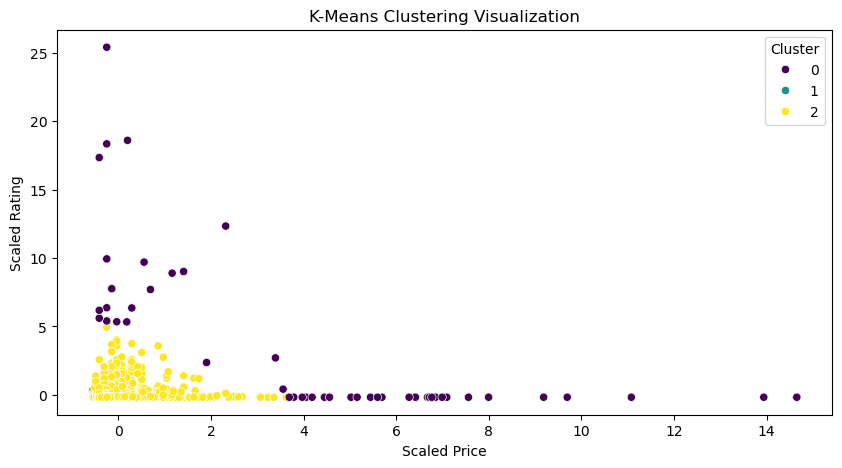

Clustered data saved to "clustered_products.csv"


In [13]:
# Select relevant features
features = ['Giá', 'Lượt đánh giá', 'Số lượng đã bán']
data = df[features]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Find the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Apply K-Means clustering with the chosen number of clusters (e.g., 3)
optimal_k = 3  # Choose the number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the elbow method
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=data_scaled[:, 0], y=data_scaled[:, 1], 
    hue=df['Cluster'], palette='viridis'
)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Scaled Price')
plt.ylabel('Scaled Rating')
plt.legend(title='Cluster')
plt.show()

# Save the clustered data
df.to_csv('./Data/clustered_products.csv', index=False)
print('Clustered data saved to "clustered_products.csv"')


In [14]:
clustered_data_new = pd.read_csv('./Data/clustered_products.csv')

cluster_0 = clustered_data_new[clustered_data_new['Cluster'] == 0]
cluster_1 = clustered_data_new[clustered_data_new['Cluster'] == 1]
cluster_2 = clustered_data_new[clustered_data_new['Cluster'] == 2]

print(cluster_0.describe())
print(cluster_1.describe())
print(cluster_2.describe())

                Giá  Lượt đánh giá  Điểm đánh giá trung bình  Số lượng đã bán  \
count  5.400000e+01      54.000000                 54.000000        54.000000   
mean   4.877124e+06     732.296296                  1.944259         0.074074   
std    3.970680e+06    1205.462138                  2.370917         0.544331   
min    1.460000e+05       0.000000                  0.000000         0.000000   
25%    1.056250e+06       0.000000                  0.000000         0.000000   
50%    4.610000e+06       0.000000                  0.000000         0.000000   
75%    6.736345e+06    1260.750000                  4.800000         0.000000   
max    1.381996e+07    5194.000000                  5.000000         4.000000   

             Fit  Cluster  
count  54.000000     54.0  
mean    0.677593      0.0  
std     1.279904      0.0  
min     0.000000      0.0  
25%     0.000000      0.0  
50%     0.000000      0.0  
75%     0.000000      0.0  
max     3.170000      0.0  
                 G

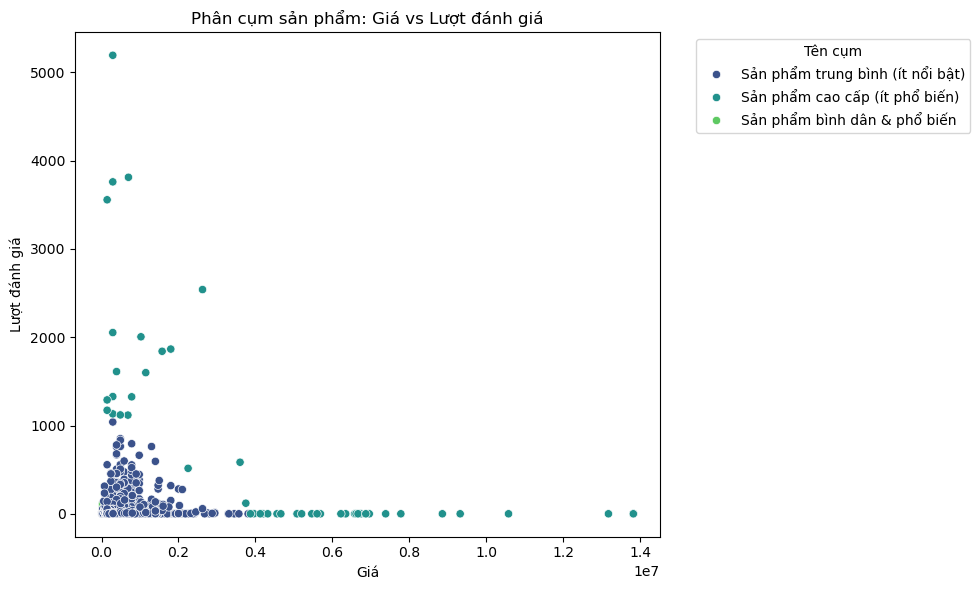

In [15]:
# Step 1: Assign meaningful names to clusters
cluster_names = {
    0: "Sản phẩm cao cấp (ít phổ biến)",
    1: "Sản phẩm bình dân & phổ biến",
    2: "Sản phẩm trung bình (ít nổi bật)"
}
clustered_data_new['Cluster Name'] = clustered_data_new['Cluster'].map(cluster_names)

# Save updated DataFrame with cluster names
output_path = './Data/clustered_products_with_names.csv'
clustered_data_new.to_csv(output_path, index=False)

# Step 2: Visualize clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustered_data_new['Giá'], y=clustered_data_new['Lượt đánh giá'],
    hue=clustered_data_new['Cluster Name'], palette='viridis'
)
plt.title('Phân cụm sản phẩm: Giá vs Lượt đánh giá')
plt.xlabel('Giá')
plt.ylabel('Lượt đánh giá')
plt.legend(title='Tên cụm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


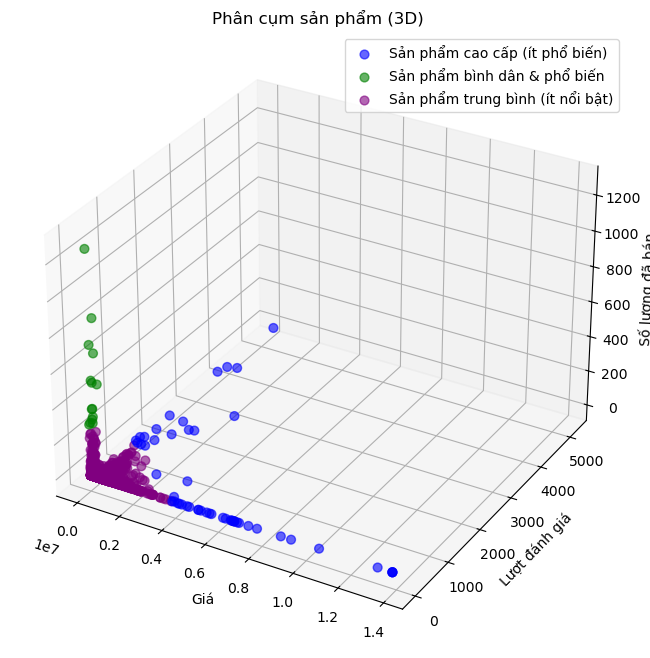

In [16]:
# Step 3: Visualize clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = {'Sản phẩm cao cấp (ít phổ biến)': 'blue',
          'Sản phẩm bình dân & phổ biến': 'green',
          'Sản phẩm trung bình (ít nổi bật)': 'purple'}

for name, color in colors.items():
    subset = clustered_data_new[clustered_data_new['Cluster Name'] == name]
    ax.scatter(
        subset['Giá'], subset['Lượt đánh giá'], subset['Số lượng đã bán'],
        label=name, alpha=0.6, s=40, color=color
    )

ax.set_title('Phân cụm sản phẩm (3D)')
ax.set_xlabel('Giá')
ax.set_ylabel('Lượt đánh giá')
ax.set_zlabel('Số lượng đã bán')
ax.legend()
plt.show()

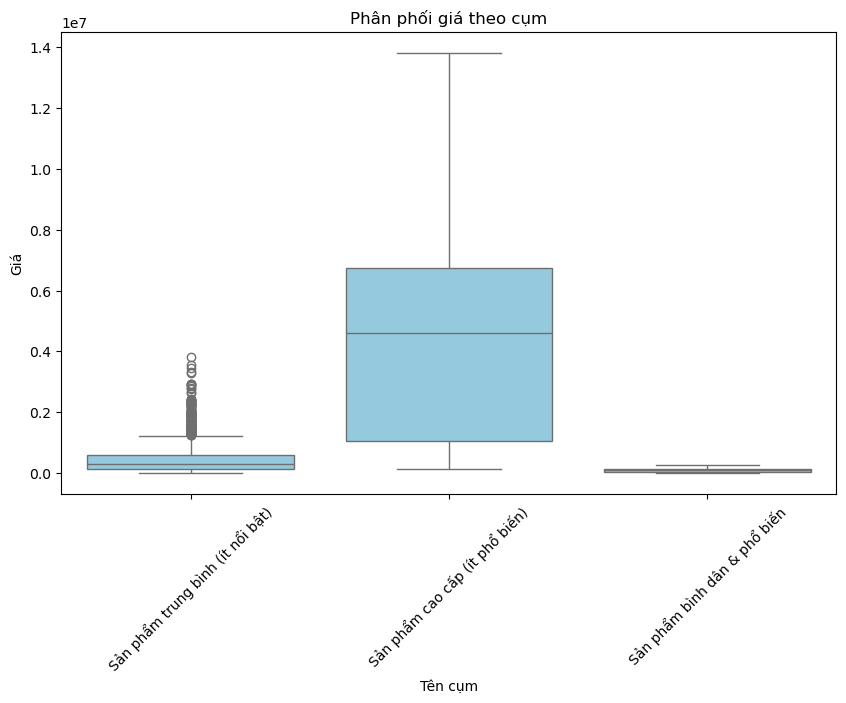

In [17]:
# Boxplot of prices by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster Name', y='Giá', data=clustered_data_new, color='skyblue')
plt.title('Phân phối giá theo cụm')
plt.xlabel('Tên cụm')
plt.ylabel('Giá')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Step 4: Identify actionable groups
# Find best-sellers and highly-rated products
best_sellers = clustered_data_new[clustered_data_new['Số lượng đã bán'] > 50]
highly_rated = clustered_data_new[clustered_data_new['Lượt đánh giá'] > 100]

# Display actionable subsets
print("Sản phẩm bán chạy (Best Sellers):")
print(best_sellers[['Tên sản phẩm', 'Giá', 'Cluster Name', 'Số lượng đã bán']].head())

print("\nSản phẩm được đánh giá cao (Highly Rated Products):")
print(highly_rated[['Tên sản phẩm', 'Giá', 'Cluster Name', 'Lượt đánh giá']].head())

Sản phẩm bán chạy (Best Sellers):
                                          Tên sản phẩm       Giá  \
15      Đầm xòe nhún vai kết hạt trai thời trang a b c   99000.0   
130  váy trễ vai trắng tay bồng dáng dài, đầm trễ v...   90000.0   
436  váy trễ vai trắng tay bồng dáng dài, đầm trễ v...   80000.0   
438                   Đầm xòe đỏ kết hoa trắng-MS0605D  190000.0   
441  váy trễ vai trắng tay bồng dáng dài, đầm trễ v...   85000.0   

                         Cluster Name  Số lượng đã bán  
15   Sản phẩm trung bình (ít nổi bật)             67.0  
130  Sản phẩm trung bình (ít nổi bật)            124.0  
436  Sản phẩm trung bình (ít nổi bật)            135.0  
438  Sản phẩm trung bình (ít nổi bật)             78.0  
441  Sản phẩm trung bình (ít nổi bật)             51.0  

Sản phẩm được đánh giá cao (Highly Rated Products):
                                           Tên sản phẩm       Giá  \
673                       Balo Thời Trang PRAZA - BL172  149000.0   
806                Balo 

## **Overall Insights**

Based on the data analysis, the products were successfully clustered into three distinct groups, each representing different consumer trends:

### **1. Cluster 1: Affordable & Popular Products**
- **Characteristics:**
  - Low prices, high ratings, and high sales volumes.
  - Appeals to a broad customer base and shows the most promise.
- **Recommended Actions:**
  - Invest more in promoting these products.
  - Expand the product lineup with similar offerings to maximize revenue potential.

### **2. Cluster 0: High-End Products (Low Popularity)**
- **Characteristics:**
  - High-priced products with low sales and ratings.
  - Targeted toward premium customers but lacks significant attention.
- **Recommended Actions:**
  - Use personalized marketing strategies to reach the target audience effectively.
  - Pair with promotions or advertisements emphasizing the quality and exclusivity of these products.

### **3. Cluster 2: Mid-Range Products (Low Engagement)**
- **Characteristics:**
  - Average prices and sales but lack standout features.
  - Struggles to differentiate itself in the market.
- **Recommended Actions:**
  - Reassess and consider improving or phasing out underperforming products.
  - Enhance product quality or reduce prices to boost competitiveness.

---



## **Conclusion**
The clustering analysis provides clear insights into where to focus and optimize efforts:
- **Cluster 1:** Focus investments to drive growth.
- **Cluster 0:** Employ personalized marketing strategies for premium customers.
- **Cluster 2:** Adjust or eliminate underperforming products to streamline the product portfolio.

These results form a solid foundation for crafting data-driven business strategies to optimize performance and maximize revenue.
